In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'your_csv_file.csv' with the actual path to your CSV file
df = pd.read_csv("C:\\Users\\91892\\OneDrive\\Desktop\\OnlineRetail.csv", encoding='latin1')


In [21]:
# Display the first few rows of the dataframe
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [8]:
# Display summary information about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [9]:
# Generate descriptive statistics
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [10]:
# Check for missing values in each column
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


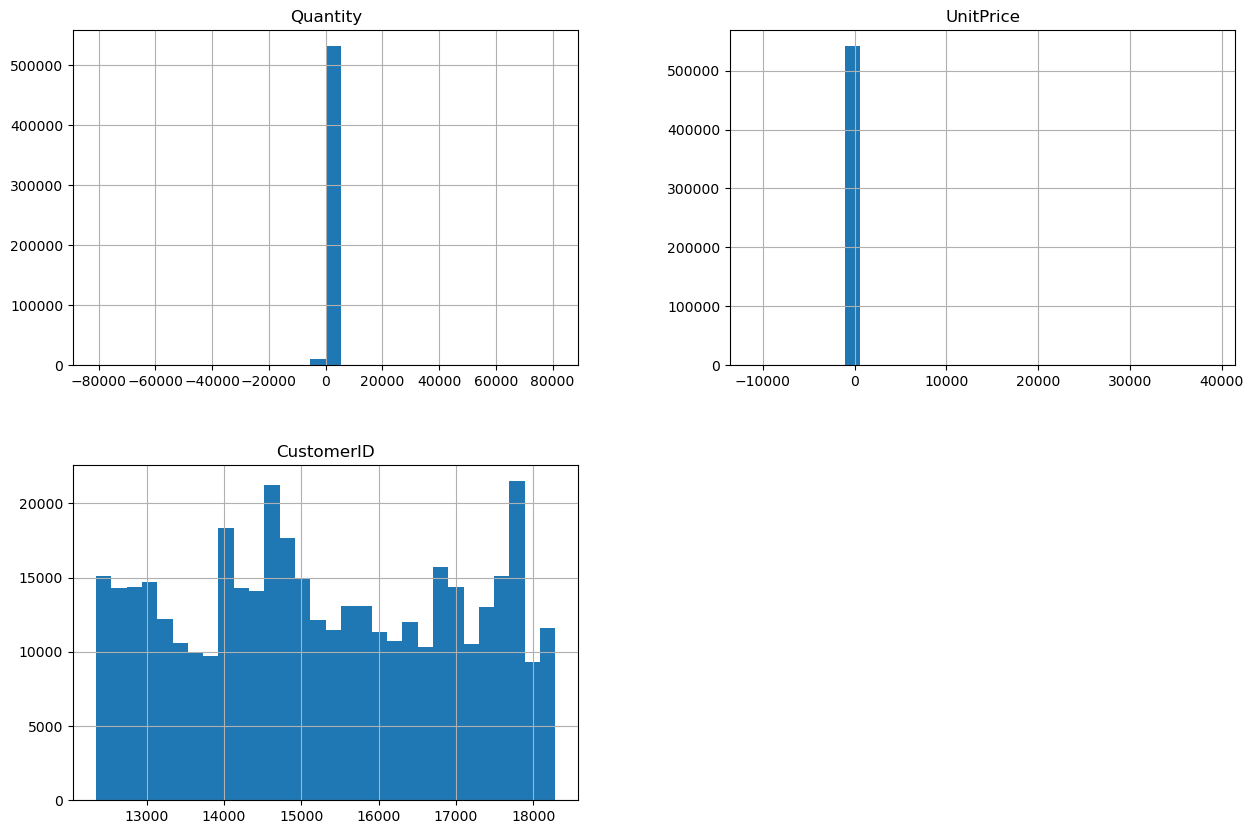

In [22]:
# Visualize data distributions
df.hist(bins=30, figsize=(15, 10))
plt.show()

In [23]:
# Handling missing values by dropping rows with missing values
df.dropna(axis=0, inplace=True)


In [24]:
# Removing duplicate entries in the dataset
df.drop_duplicates(inplace=True)

In [25]:
# Convert CustomerID from float to int
df['CustomerID'] = df['CustomerID'].astype(int)

# Display datatypes after conversion
print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int32
Country         object
dtype: object


In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
numerical_columns = ['Quantity', 'UnitPrice', 'CustomerID']
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display standardized dataframe
print(df_standardized.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.024705   
1    536365     71053                  WHITE METAL LANTERN -0.024705   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER -0.016714   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.024705   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.024705   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26  -0.013246    1.498736  United Kingdom  
1  12/1/2010 8:26  -0.001205    1.498736  United Kingdom  
2  12/1/2010 8:26  -0.010379    1.498736  United Kingdom  
3  12/1/2010 8:26  -0.001205    1.498736  United Kingdom  
4  12/1/2010 8:26  -0.001205    1.498736  United Kingdom  


In [36]:
# Min-Max Scaling (Normalization)
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [28]:
# Display normalized dataframe
print(df_normalized.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  0.500037   
1    536365     71053                  WHITE METAL LANTERN  0.500037   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  0.500049   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  0.500037   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  0.500037   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26   0.000065    0.926443  United Kingdom  
1  12/1/2010 8:26   0.000087    0.926443  United Kingdom  
2  12/1/2010 8:26   0.000071    0.926443  United Kingdom  
3  12/1/2010 8:26   0.000087    0.926443  United Kingdom  
4  12/1/2010 8:26   0.000087    0.926443  United Kingdom  


In [30]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df_normalized, columns=['Country', 'Description', 'StockCode'], drop_first=True)
print(df_encoded.head())

  InvoiceNo  Quantity     InvoiceDate  UnitPrice  CustomerID  Country_Austria  \
0    536365  0.500037  12/1/2010 8:26   0.000065    0.926443            False   
1    536365  0.500037  12/1/2010 8:26   0.000087    0.926443            False   
2    536365  0.500049  12/1/2010 8:26   0.000071    0.926443            False   
3    536365  0.500037  12/1/2010 8:26   0.000087    0.926443            False   
4    536365  0.500037  12/1/2010 8:26   0.000087    0.926443            False   

   Country_Bahrain  Country_Belgium  Country_Brazil  Country_Canada  ...  \
0            False            False           False           False  ...   
1            False            False           False           False  ...   
2            False            False           False           False  ...   
3            False            False           False           False  ...   
4            False            False           False           False  ...   

   StockCode_90214Y  StockCode_90214Z  StockCode_BANK CH

In [37]:
df_fe = df_encoded.copy()

# Creating new features based on existing ones
# Create a feature for total sales
df_fe['TotalSales'] = df_fe['Quantity'] * df_fe['UnitPrice']

# Create a feature for the day of the week (Monday = 0, Sunday = 6)
df_fe['DayOfWeek'] = df_fe['InvoiceDate'].dt.dayofweek

# Create a feature for the hour of the day
df_fe['HourOfDay'] = df_fe['InvoiceDate'].dt.hour

print(df_fe.head())


  InvoiceNo  Quantity         InvoiceDate  UnitPrice  CustomerID  \
0    536365  0.500037 2010-12-01 08:26:00   0.000065    0.926443   
1    536365  0.500037 2010-12-01 08:26:00   0.000087    0.926443   
2    536365  0.500049 2010-12-01 08:26:00   0.000071    0.926443   
3    536365  0.500037 2010-12-01 08:26:00   0.000087    0.926443   
4    536365  0.500037 2010-12-01 08:26:00   0.000087    0.926443   

   Country_Austria  Country_Bahrain  Country_Belgium  Country_Brazil  \
0            False            False            False           False   
1            False            False            False           False   
2            False            False            False           False   
3            False            False            False           False   
4            False            False            False           False   

   Country_Canada  ...  StockCode_C2  StockCode_CRUK  StockCode_D  \
0           False  ...         False           False        False   
1           False  .

In [ ]:
# Calculate correlation matrix
correlation_matrix = df_fe[['Quantity', 'UnitPrice', 'CustomerID', 'TotalSales', 'DayOfWeek', 'HourOfDay']].corr()

# Visualize using a heatmap to identify highly correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()